## Process images and apply stereological corrections

This notebook loads and processes image data for sample AX13_RC04. The notebook loads the vesicle characteristics computed using imageJ (FIJI), scales the data using the pixel resolution in the metadata file, and applies three different stereological methods (Cheng and Lemlich, 1983; Proussevitch and Sahagian, 1998; and Saltikov, 1967).

### References

Cheng, H.C., Lemlich, R., 1983. Errors in the measurement of bubble size distribution in foam. Ind. Eng. Chem. Fundam. 22, 105–109. https://doi.org/10.1021/i100009a018
    
Sahagian, D.L., Proussevitch, A.A., 1998. 3D particle size distributions from 2D observations: stereology for natural applications. J. Volcanol. Geotherm. Res. 84, 173–196. https://doi.org/10.1016/S0377-0273(98)00043-2

Saltikov, S., 1967. The determination of the size distribution of particles in an opaque material from a measurement of the size distribution of their sections, in: Stereology: Proceeding of the Second International Congress for Stereology. pp. 163–173.
        
Early development of this code also referenced the FOAMS MATLAB program:

Shea, T., Houghton, B.F., Gurioli, L., Cashman, K.V., Hammer, J.E., Hobden, B.J., 2010. Textural studies of vesicles in volcanic rocks: An integrated methodology. J. Volcanol. Geotherm. Res. 190, 271–289. https://doi.org/10.1016/j.jvolgeores.2009.12.003


### Package imports

In [1]:
from vesicle_analysis import Sample
from matplotlib import pyplot as plt
import warnings

### Load and scale the image data

In [2]:
data_dir = '../data/image_data/Axial'
sample_name = 'AX13_RC04'
min_diameter = 15
units = 'micrometers'

sample = Sample(sample_name)

In [3]:
for image in ['04','05','06']:
    file = '/'.join([data_dir,'_'.join([sample_name,image,'results_outline.csv'])])
    meta_file = '/'.join([data_dir,'_'.join([sample_name,image,'meta.txt'])])
    sample.add_image(image, file, meta_file, units, min_diameter)

### Apply Cheng and Lemlich (1983), Proussevitch and Sahagian (1998), and Saltikov (1967) corrections to the 2D data
Note, this applies the correction to the aggregated image data for the sample. Call apply_vsd_corr on the image (sample.images[ind]) to apply stereological corrections to an individual image.

In [4]:
# ignore warnings cuased by taking the log of Nv for bins with no vesicles
warnings.simplefilter('ignore')

sample.apply_vsd_corr(key='cl',
                      method='ChengLemlich',
                      length_type='radius',
                      nbins=12)
sample.apply_vsd_corr(key='sp', 
                      method='SahagianProussevitch', 
                      length_type='diameter',
                      nbins=8)
sample.apply_vsd_corr(key='s', 
                      method='Saltikov',
                      length_type='diameter',
                      nbins=12)


### Make a quick plot showing the results of the different corrections

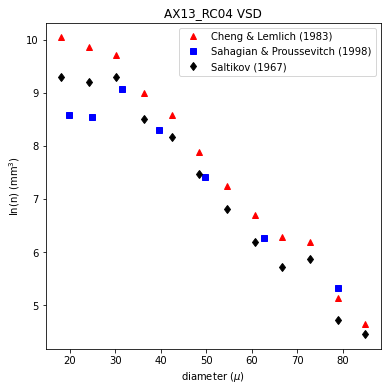

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sample.vsd[0].plot_data(ax, 'lnn', 'r', '^')
sample.vsd[1].plot_data(ax, 'lnn', 'b', 's')
sample.vsd[2].plot_data(ax, 'lnn', 'k', 'd')
ax.set_xlabel(r'diameter ($\mu$m)')
ax.set_ylabel(r'ln(n) (mm$^3$)')
ax.set_title(' '.join([sample_name, 'VSD']))
ax.legend(['Cheng & Lemlich (1983)','Sahagian & Proussevitch (1998)','Saltikov (1967)'])

### Add microCT data for the sample

In [6]:
sample.add_scan(scan_id='ax13_rc04_hres',
                ctan_file='../data/microCT/AX13_RC04_hres__rec0000.ctan_02.txt',
                i3d_file='../data/microCT/AX13_RC04_hres__rec0000_i3d_02.txt',
                min_diameter=min_diameter)